# Project Description
<!-- In this notebook I will  -->

# The Data
To demonstrate I will first start by using a small dataset I created on my own. The data can be found in the `./data` folder. It consists of two columns (word, label). Here are two examples `word=love,label=positive, word=hate,label=negative`. I will put this through the bert model to get an embedding and then use a dimensionalty reduction algorithm to plot each word. 

Later on I will be using book data. This data has two columns. I got this data from [here](https://www.gutenberg.org/)

First we will import some useful tools that will help us.

In [1]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from transformers import BertTokenizer, BertModel

/Users/gael/git-repos/notebooks/book_genre_detection/env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# TODO: check for correct embedding
# TODO: make sure pca is working the way its supposed to be
# TODO: make good visuals (categories)

# First Example

In [3]:
data = pd.read_csv('./words.csv')

In [4]:
data.head()

,word,label
0,loved,positive
1,terrific,positive
2,admired,positive
3,jolly,positive
4,brave,positive


In [5]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [6]:
# tokenize every word in the dataframe
encoded_data = [tokenizer(i, return_tensors='pt') for i in data.word]

In [7]:
# Our words have been encoded into a list of ids that look like this: tensor([[ 101, 3866,  102]]). 
# 101 and 102 are for start and stop. 3866 is the id of our actual word embedding and its what we actually
# need. We will extract this later.
encoded_data[0]

{'input_ids': tensor([[ 101, 3866,  102]]), 'token_type_ids': tensor([[0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1]])}

In [8]:
# Get the word embedding for each word in our dataset
word_embeddings = [model(**i) for i in encoded_data]

In [9]:
word_embeddings[0].last_hidden_state.shape

torch.Size([1, 3, 768])

In [10]:
# get the last hidden state for each of the embeddings
embeddings = [i.last_hidden_state for i in word_embeddings]

In [11]:
# Get the actual word embeddings
embeddings = [i[0][1] for i in embeddings]

In [12]:
embeddings = [i.detach().numpy() for i in embeddings]

In [13]:
# Add the embeddings to our dataframe
data['word_embeddings'] = embeddings

# Visualizing

In [14]:
data.head()

,word,label,word_embeddings
0,loved,positive,"[0.5129337, -0.04044947, 0.42860067, -0.150437..."
1,terrific,positive,"[0.33330074, -0.20869645, -0.1652221, -0.06318..."
2,admired,positive,"[-0.25650117, 0.022439487, 0.25480837, -0.0880..."
3,jolly,positive,"[-0.22022378, -0.20243269, 0.10135959, -0.3264..."
4,brave,positive,"[-0.08306722, -0.11899652, -0.46022692, -0.438..."


In [15]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(list(data.word_embeddings))
principal_df = pd.DataFrame(data = principal_components, columns=['pc_one', 'pc_two'])

In [16]:
principal_df.head()

,pc_one,pc_two
0,-2.438594,-0.386581
1,-1.084823,0.115590
2,-2.641706,0.350832
3,-4.381246,0.961004
4,-2.861545,0.087100


In [17]:
positive_words = principal_df.head(25)
negative_words = principal_df.tail(25)

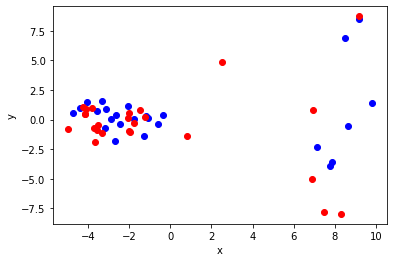

In [18]:
plt.scatter(positive_words.pc_one, positive_words.pc_two, color='b')
plt.scatter(negative_words.pc_one, negative_words.pc_two, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show();

# Using the Book Dataset

In [19]:
df = pd.read_csv('./data.csv')

In [20]:
df

,book,words
0,./data/cook_book_one.txt,project gutenberg's the whitehouse cookbook by...
1,./data/cook_book_three.txt,the project gutenberg ebook of new royal cook ...
2,./data/gothic_novel_four.txt,the project gutenberg ebook of the works of ed...
3,./data/gothic_novel_six.txt,the project gutenberg ebook of northanger abbe...
4,./data/gothic_novel_two.txt,project gutenberg’s the complete works of will...
5,./data/gothic_novel_three.txt,the project gutenberg ebook of dracula by bram...
6,./data/cook_book_four.txt,the project gutenberg ebook of the italian coo...
7,./data/gothic_novel_ten.txt,the project gutenberg ebook of the castle of o...
8,./data/gothic_novel_eight.txt,the project gutenberg ebook of the vampyre a t...
9,./data/gothic_novel_nine.txt,the project gutenberg ebook of the masque of t...
